### Machine Learning Methods - HAM10000 dataset

import libraries

In [1]:
import numpy as np
import multidim
import itertools
import os
import hdbscan
import sys
import time
import pandas as pd
import itertools
import pickle
import mpi4py as MPI

from copy import deepcopy
from matplotlib.patches import Ellipse
from ripser import ripser
from persim import plot_diagrams
from numba import jit, njit, prange
from sklearn import mixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.kernel_ridge import KernelRidge

from multidim.covertree import CoverTree
from multidim.models import CDER

import matplotlib.pyplot as plt
#import ATS
from gudhi.representations.vector_methods import Landscape

from persim import PersImage
from persim import heat

import numpy as np
import multidim
import itertools
import os
import hdbscan
import sys
import time
import pandas as pd
import itertools
import pickle

from copy import deepcopy
from matplotlib.patches import Ellipse
from ripser import ripser
from persim import plot_diagrams
from numba import jit, njit, prange
from sklearn import mixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.kernel_ridge import KernelRidge
import numba
from multidim.covertree import CoverTree
from multidim.models import CDER

import matplotlib.pyplot as plt

from persim import PersImage


sys.path.append('../persistence_methods')
import ATS
from persistence_methods import kernel_features
from persistence_methods import tent_features
from persistence_methods import carlsson_coordinates
from persistence_methods import adaptive_features
from persistence_methods import landscape_features
from persistence_methods import persistence_image_features
from persistence_methods import fast_kernel_features


In [2]:
print(pd.__version__)

1.1.1


import data

In [3]:
Data0 = pickle.load(open("persistence/diagrams_0_1000.pickle", "rb"))
Data1 = pickle.load(open("persistence/diagrams_1000_2000.pickle", "rb"))
Data2 = pickle.load(open("persistence/diagrams_2000_3000.pickle", "rb"))
Data3 = pickle.load(open("persistence/diagrams_3000_4000.pickle", "rb"))
Data4 = pickle.load(open("persistence/diagrams_4000_5000.pickle", "rb"))
Data5 = pickle.load(open("persistence/diagrams_5000_6000.pickle", "rb"))
Data6 = pickle.load(open("persistence/diagrams_6000_7000.pickle", "rb"))
Data7 = pickle.load(open("persistence/diagrams_7000_8000.pickle", "rb"))
Data8 = pickle.load(open("persistence/diagrams_8000_9000.pickle", "rb"))
Data9 = pickle.load(open("persistence/diagrams_9000_10000.pickle", "rb"))

In [4]:
Data_full = pd.concat([Data0, Data1, Data2, Data3, Data4, Data5, Data6, Data7, Data8, Data9], axis=0, ignore_index=True)

#### Dataset summary

In [8]:
n,p = Data_full.shape
np_data = np.array(Data_full)
total_birth_death_pairs = 0
max_birth_death_pairs = 0
min_birth_death_pairs = 250000
for i in range(0,n):
    for j in range(0,p-1):
        total_birth_death_pairs += len(np_data[i,j])
        max_birth_death_pairs = max(max_birth_death_pairs,len(np_data[i,j]))
        min_birth_death_pairs = min(min_birth_death_pairs,len(np_data[i,j]))
print(total_birth_death_pairs/(n*(p-1)))
print(min_birth_death_pairs)
print(max_birth_death_pairs)

5783.416944444444
13
32610


In [9]:
Data_train, Data = train_test_split(Data_full, test_size = .025, random_state=12, stratify = Data_full['labels'])

In [11]:
R0 = Data['dgm_R_rgb_0']
G0 = Data['dgm_G_rgb_0']
B0 = Data['dgm_B_rgb_0']

H0 = Data['dgm_H_hsv_0']
S0 = Data['dgm_S_hsv_0']
V0 = Data['dgm_V_hsv_0']

X0 = Data['dgm_X_xyz_0']
Y0 = Data['dgm_Y_xyz_0']
Z0 = Data['dgm_Z_xyz_0']

R1 = Data['dgm_R_rgb_1']
G1 = Data['dgm_G_rgb_1']
B1 = Data['dgm_B_rgb_1']

H1 = Data['dgm_H_hsv_1']
S1 = Data['dgm_S_hsv_1']
V1 = Data['dgm_V_hsv_1']

X1 = Data['dgm_X_xyz_1']
Y1 = Data['dgm_Y_xyz_1']
Z1 = Data['dgm_Z_xyz_1']

labels = Data['labels']

creating training index

In [12]:
R0_train, R0_test, R1_train, R1_test, G0_train, G0_test, G1_train, G1_test, B0_train, B0_test, B1_train, B1_test, H0_train, H0_test, H1_train, H1_test, S0_train, S0_test, S1_train, S1_test, V0_train, V0_test, V1_train, V1_test, X0_train, X0_test, X1_train, X1_test, Y0_train, Y0_test, Y1_train, Y1_test, Z0_train, Z0_test, Z1_train, Z1_test,y_train, y_test = train_test_split(R0, R1, G0, G1, B0, B1, H0, H1, S0, S1, V0, V1, X0, X1, Y0, Y1, Z0, Z1, labels, test_size = .1, random_state=12, stratify = labels)

In [13]:
R0_train = np.array(R0_train)
R0_test = np.array(R0_test) 
G0_train = np.array(G0_train) 
G0_test = np.array(G0_test) 
B0_train = np.array(B0_train)
B0_test = np.array(B0_test)
H0_train = np.array(H0_train) 
H0_test = np.array(H0_test) 
S0_train = np.array(S0_train) 
S0_test = np.array(S0_test) 
V0_train = np.array(V0_train) 
V0_test = np.array(V0_test)
X0_train = np.array(X0_train) 
X0_test = np.array(X0_test) 
Y0_train = np.array(Y0_train) 
Y0_test = np.array(Y0_test) 
Z0_train = np.array(Z0_train) 
Z0_test = np.array(Z0_test) 

R1_train = np.array(R1_train)
R1_test = np.array(R1_test) 
G1_train = np.array(G1_train) 
G1_test = np.array(G1_test) 
B1_train = np.array(B1_train)
B1_test = np.array(B1_test)
H1_train = np.array(H1_train) 
H1_test = np.array(H1_test) 
S1_train = np.array(S1_train) 
S1_test = np.array(S1_test) 
V1_train = np.array(V1_train) 
V1_test = np.array(V1_test)
X1_train = np.array(X1_train) 
X1_test = np.array(X1_test) 
Y1_train = np.array(Y1_train) 
Y1_test = np.array(Y1_test) 
Z1_train = np.array(Z1_train) 
Z1_test = np.array(Z1_test) 

y_train = np.array(y_train) 
y_test = np.array(y_test)

In [14]:
def subsample(dgm, frac = .05, t = 4):
    dgm_diff = np.diff(dgm)
    keep = np.where(dgm_diff>t)[0]
    sample = np.where(dgm_diff<=t)[0]
    s_end = sample.size
    s_size = int(np.floor(s_end*frac))
    s_sample = np.random.choice(s_end, s_size,replace=False)
    s_index = np.hstack([keep, s_sample])
    dgm_sampled = dgm[s_index]
    return dgm_sampled


In [15]:
R0_train_sample = []
for i in range(0, len(R0_train)):
    dgm = subsample(R0_train[i])
    R0_train_sample.append(dgm)
    
R0_test_sample = []
for i in range(0, len(R0_test)):
    dgm = subsample(R0_test[i])
    R0_test_sample.append(dgm)
    
R1_train_sample = []
for i in range(0, len(R1_train)):
    dgm = subsample(R1_train[i])
    R1_train_sample.append(dgm)
    
R1_test_sample = []
for i in range(0, len(R1_test)):
    dgm = subsample(R1_test[i])
    R1_test_sample.append(dgm)
    
G0_train_sample = []
for i in range(0, len(G0_train)):
    dgm = subsample(G0_train[i])
    G0_train_sample.append(dgm)
    
G0_test_sample = []
for i in range(0, len(G0_test)):
    dgm = subsample(G0_test[i])
    G0_test_sample.append(dgm)
    
G1_train_sample = []
for i in range(0, len(G1_train)):
    dgm = subsample(G1_train[i])
    G1_train_sample.append(dgm)
    
G1_test_sample = []
for i in range(0, len(G1_test)):
    dgm = subsample(G1_test[i])
    G1_test_sample.append(dgm)
    
B0_train_sample = []
for i in range(0, len(B0_train)):
    dgm = subsample(B0_train[i])
    B0_train_sample.append(dgm)
    
B0_test_sample = []
for i in range(0, len(B0_test)):
    dgm = subsample(B0_test[i])
    B0_test_sample.append(dgm)
    
B1_train_sample = []
for i in range(0, len(B1_train)):
    dgm = subsample(B1_train[i])
    B1_train_sample.append(dgm)
    
B1_test_sample = []
for i in range(0, len(B1_test)):
    dgm = subsample(B1_test[i])
    B1_test_sample.append(dgm)
    
H0_train_sample = []
for i in range(0, len(H0_train)):
    dgm = subsample(H0_train[i])
    H0_train_sample.append(dgm)
    
H0_test_sample = []
for i in range(0, len(H0_test)):
    dgm = subsample(H0_test[i])
    H0_test_sample.append(dgm)
    
H1_train_sample = []
for i in range(0, len(H1_train)):
    dgm = subsample(H1_train[i])
    H1_train_sample.append(dgm)
    
H1_test_sample = []
for i in range(0, len(H1_test)):
    dgm = subsample(H1_test[i])
    H1_test_sample.append(dgm)
    
S0_train_sample = []
for i in range(0, len(S0_train)):
    dgm = subsample(S0_train[i])
    S0_train_sample.append(dgm)
    
S0_test_sample = []
for i in range(0, len(S0_test)):
    dgm = subsample(S0_test[i])
    S0_test_sample.append(dgm)
    
S1_train_sample = []
for i in range(0, len(S1_train)):
    dgm = subsample(S1_train[i])
    S1_train_sample.append(dgm)
    
S1_test_sample = []
for i in range(0, len(S1_test)):
    dgm = subsample(S1_test[i])
    S1_test_sample.append(dgm)
    
V0_train_sample = []
for i in range(0, len(V0_train)):
    dgm = subsample(V0_train[i])
    V0_train_sample.append(dgm)
    
V0_test_sample = []
for i in range(0, len(V0_test)):
    dgm = subsample(V0_test[i])
    V0_test_sample.append(dgm)
    
V1_train_sample = []
for i in range(0, len(V1_train)):
    dgm = subsample(V1_train[i])
    V1_train_sample.append(dgm)
    
V1_test_sample = []
for i in range(0, len(V1_test)):
    dgm = subsample(V1_test[i])
    V1_test_sample.append(dgm)
    
X0_train_sample = []
for i in range(0, len(X0_train)):
    dgm = subsample(X0_train[i])
    X0_train_sample.append(dgm)
    
X0_test_sample = []
for i in range(0, len(X0_test)):
    dgm = subsample(X0_test[i])
    X0_test_sample.append(dgm)
    
X1_train_sample = []
for i in range(0, len(X1_train)):
    dgm = subsample(X1_train[i])
    X1_train_sample.append(dgm)
    
X1_test_sample = []
for i in range(0, len(X1_test)):
    dgm = subsample(X1_test[i])
    X1_test_sample.append(dgm)
    
Y0_train_sample = []
for i in range(0, len(Y0_train)):
    dgm = subsample(Y0_train[i])
    Y0_train_sample.append(dgm)
    
Y0_test_sample = []
for i in range(0, len(Y0_test)):
    dgm = subsample(Y0_test[i])
    Y0_test_sample.append(dgm)
    
Y1_train_sample = []
for i in range(0, len(Y1_train)):
    dgm = subsample(Y1_train[i])
    Y1_train_sample.append(dgm)
    
Y1_test_sample = []
for i in range(0, len(Y1_test)):
    dgm = subsample(Y1_test[i])
    Y1_test_sample.append(dgm)
    
Z0_train_sample = []
for i in range(0, len(Z0_train)):
    dgm = subsample(Z0_train[i])
    Z0_train_sample.append(dgm)
    
Z0_test_sample = []
for i in range(0, len(Z0_test)):
    dgm = subsample(Z0_test[i])
    Z0_test_sample.append(dgm)
    
Z1_train_sample = []
for i in range(0, len(Z1_train)):
    dgm = subsample(Z1_train[i])
    Z1_train_sample.append(dgm)
    
Z1_test_sample = []
for i in range(0, len(Z1_test)):
    dgm = subsample(Z1_test[i])
    Z1_test_sample.append(dgm)

In [16]:
R0_train_sample = np.array(R0_train_sample)
R0_test_sample = np.array(R0_test_sample)

dgm0_sample = np.array(R0_train_sample)
dgm1_sample = np.array(R1_train_sample)

(0.0, 100.0)

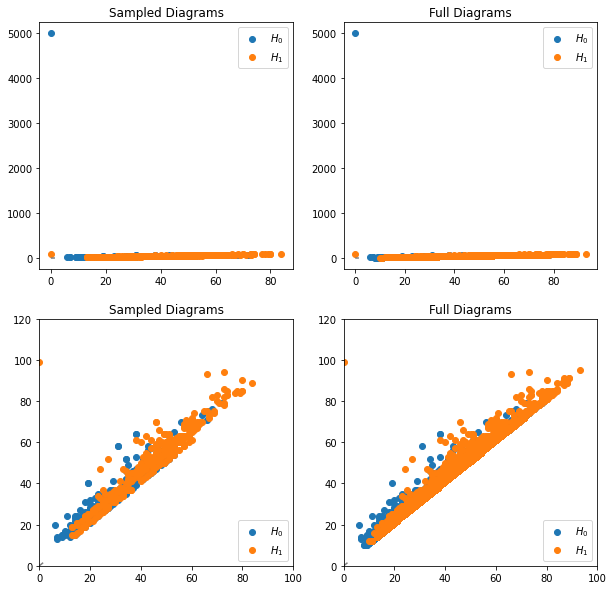

In [17]:
dgm0 = R0_train[1]
dgm1 = R1_train[1]

dgm0_sampled = dgm0_sample[1]
dgm1_sampled = dgm1_sample[1]

dgm0_d = dgm0[np.where(np.diff(dgm0)<5000)[0],:]
dgm1_d = dgm1[np.where(np.diff(dgm1)<5000)[0],:]

dgm0_sampled_d = dgm0_sampled[np.where(np.diff(dgm0_sampled)<5000)[0],:]
dgm1_sampled_d = dgm1_sampled[np.where(np.diff(dgm1_sampled)<5000)[0],:]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(dgm0_sampled[:,0], dgm0_sampled[:,1], label=r'$H_0$')
axs[0, 0].scatter(dgm1_sampled[:,0], dgm1_sampled[:,1], label=r'$H_1$')
axs[0, 0].plot(np.arange(0,1.6,0.1), np.arange(0,1.6,0.1), '--', c='gray')
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_title("Sampled Diagrams")

axs[0, 1].scatter(dgm0[:,0], dgm0[:,1], label=r'$H_0$')
axs[0, 1].scatter(dgm1[:,0], dgm1[:,1], label=r'$H_1$')
axs[0,1].plot(np.arange(0,1.6,0.1), np.arange(0,1.6,0.1), '--', c='gray')
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_title("Full Diagrams")

axs[1, 0].scatter(dgm0_sampled_d[:,0], dgm0_sampled_d[:,1], label=r'$H_0$')
axs[1, 0].scatter(dgm1_sampled_d[:,0], dgm1_sampled_d[:,1], label=r'$H_1$')
axs[1, 0].plot(np.arange(0,1.6,0.1), np.arange(0,1.6,0.1), '--', c='gray')
axs[1, 0].legend(loc='lower right')
axs[1, 0].set_title("Sampled Diagrams")
axs[1, 0].set_ylim(0,120)
axs[1, 0].set_xlim(0,100)

axs[1, 1].scatter(dgm0_d[:,0], dgm0_d[:,1], label=r'$H_0$')
axs[1, 1].scatter(dgm1_d[:,0], dgm1_d[:,1], label=r'$H_1$')
axs[1, 1].plot(np.arange(0,1.6,0.1), np.arange(0,1.6,0.1), '--', c='gray')
axs[1, 1].legend(loc='lower right')
axs[1, 1].set_title("Full Diagrams")
axs[1, 1].set_ylim(0,120)
axs[1, 1].set_xlim(0,100)


In [18]:
X_train_features_R0_tent, X_test_features_R0_tent = tent_features(R0_train, R0_test, d = 3, padding = 1)

Computing features took (seconds):0.7671222686767578


In [19]:
X_train_features_R0_tent_sampled, X_test_features_R0_tent_sampled = tent_features(R0_train_sample, R0_test_sample, d = 3, padding = 1)

Computing features took (seconds):0.17668581008911133


In [20]:
ridge_model = RidgeClassifier().fit(X_train_features_R0_tent, y_train)
ridge_model.score(X_train_features_R0_tent, y_train)
#ridge_model.score(X_test_features_R0_tent, y_test)

0.6711111111111111

In [21]:
ridge_model = RidgeClassifier().fit(X_train_features_R0_tent_sampled, y_train)
ridge_model.score(X_train_features_R0_tent_sampled, y_train)
#ridge_model.score(X_test_features_R0_tent_sampled, y_test)

0.6711111111111111

### Create tent functions

In [22]:
d = [3,5,10]
p = [.5,1, 1.5]


train_accuracy=[]
test_accuracy=[]
d_model=[]
p_model=[]
model_type=[]
c_model=[]

for i in range(0,3):
    for j in range(0,3):
        X_train_features_R0_tent, X_test_features_R0_tent = tent_features(R0_train, R0_test, d = d[i], padding = p[j])
        X_train_features_G0_tent, X_test_features_G0_tent = tent_features(G0_train, G0_test, d = d[i], padding = p[j])
        X_train_features_B0_tent, X_test_features_B0_tent = tent_features(B0_train, B0_test, d = d[i], padding = p[j])
        X_train_features_X0_tent, X_test_features_X0_tent = tent_features(X0_train, X0_test, d = d[i], padding = p[j])
        X_train_features_Y0_tent, X_test_features_Y0_tent = tent_features(Y0_train, Y0_test, d = d[i], padding = p[j])
        X_train_features_Z0_tent, X_test_features_Z0_tent = tent_features(Z0_train, Z0_test, d = d[i], padding = p[j])
        X_train_features_H0_tent, X_test_features_H0_tent = tent_features(H0_train, H0_test, d = d[i], padding = p[j])
        X_train_features_S0_tent, X_test_features_S0_tent = tent_features(S0_train, S0_test, d = d[i], padding = p[j])
        X_train_features_V0_tent, X_test_features_V0_tent = tent_features(V0_train, V0_test, d = d[i], padding = p[j])

        X_train_features_R1_tent, X_test_features_R1_tent = tent_features(R1_train, R1_test, d = d[i], padding = p[j])
        X_train_features_G1_tent, X_test_features_G1_tent = tent_features(G1_train, G1_test, d = d[i], padding = p[j])
        X_train_features_B1_tent, X_test_features_B1_tent = tent_features(B1_train, B1_test, d = d[i], padding = p[j])
        X_train_features_X1_tent, X_test_features_X1_tent = tent_features(X1_train, X1_test, d = d[i], padding = p[j])
        X_train_features_Y1_tent, X_test_features_Y1_tent = tent_features(Y1_train, Y1_test, d = d[i], padding = p[j])
        X_train_features_Z1_tent, X_test_features_Z1_tent = tent_features(Z1_train, Z1_test, d = d[i], padding = p[j])
        X_train_features_H1_tent, X_test_features_H1_tent = tent_features(H1_train, H1_test, d = d[i], padding = p[j])
        X_train_features_S1_tent, X_test_features_S1_tent = tent_features(S1_train, S1_test, d = d[i], padding = p[j])
        X_train_features_V1_tent, X_test_features_V1_tent = tent_features(V1_train, V1_test, d = d[i], padding = p[j])


        X_train_features = np.column_stack((X_train_features_R0_tent, X_train_features_G0_tent, X_train_features_B0_tent,X_train_features_X0_tent, X_train_features_Y0_tent, X_train_features_Z0_tent,X_train_features_H0_tent, X_train_features_S0_tent, X_train_features_V0_tent,X_train_features_R1_tent, X_train_features_G1_tent, X_train_features_B1_tent,X_train_features_X1_tent, X_train_features_Y1_tent, X_train_features_Z1_tent,X_train_features_H1_tent, X_train_features_S1_tent, X_train_features_V1_tent))
        X_test_features = np.column_stack((X_test_features_R0_tent, X_test_features_G0_tent, X_test_features_B0_tent,X_test_features_X0_tent, X_test_features_Y0_tent, X_test_features_Z0_tent,X_test_features_H0_tent, X_test_features_S0_tent, X_test_features_V0_tent,X_test_features_R1_tent, X_test_features_G1_tent, X_test_features_B1_tent,X_test_features_X1_tent, X_test_features_Y1_tent, X_test_features_Z1_tent,X_test_features_H1_tent, X_test_features_S1_tent, X_test_features_V1_tent))

        ridge_model = RidgeClassifier().fit(X_train_features, y_train)
        train_accuracy.append(ridge_model.score(X_train_features, y_train))
        test_accuracy.append(ridge_model.score(X_test_features, y_test))
        model_type.append('Ridge')
        d_model.append(d[i])
        p_model.append(p[j])
        c_model.append(0)
        for k in [1,5,10]:
            clf_model = SVC(kernel='rbf', C=k).fit(X_train_features, y_train)
            train_accuracy.append(clf_model.score(X_train_features, y_train))
            test_accuracy.append(clf_model.score(X_test_features, y_test))
            model_type.append('SVM')
            d_model.append(d[i])
            p_model.append(p[j])
            c_model.append(k)

Computing features took (seconds):0.7521090507507324
Computing features took (seconds):0.6873772144317627
Computing features took (seconds):0.6674699783325195
Computing features took (seconds):1.176936149597168
Computing features took (seconds):0.9829037189483643
Computing features took (seconds):1.0060808658599854
Computing features took (seconds):1.268841028213501
Computing features took (seconds):1.2603766918182373
Computing features took (seconds):0.9271559715270996
Computing features took (seconds):0.7282648086547852
Computing features took (seconds):0.7054212093353271
Computing features took (seconds):0.9192228317260742
Computing features took (seconds):1.12990403175354
Computing features took (seconds):1.2734692096710205
Computing features took (seconds):1.1368048191070557
Computing features took (seconds):1.0923471450805664
Computing features took (seconds):0.86857008934021
Computing features took (seconds):0.8107709884643555
Computing features took (seconds):0.7601571083068848

Computing features took (seconds):21.26402711868286
Computing features took (seconds):19.78874111175537
Computing features took (seconds):19.80819821357727
Computing features took (seconds):19.55057716369629
Computing features took (seconds):18.19796395301819
Computing features took (seconds):15.354358911514282


In [23]:
tent_results = pd.DataFrame()
tent_results['Training Accuracy'] = train_accuracy
tent_results['Test Accuracy'] = test_accuracy
tent_results['d'] = d_model
tent_results['p'] = p_model
tent_results['c'] = c_model
tent_results['Model Type'] = model_type

In [24]:
tent_sorted = tent_results.sort_values(by=['Test Accuracy', 'Training Accuracy'],ascending=False)
tent_sorted[0:60]

,Training Accuracy,Test Accuracy,d,p,c,Model Type
34,0.751111,0.76,10,1.5,5,SVM
27,0.808889,0.72,10,0.5,10,SVM
26,0.786667,0.72,10,0.5,5,SVM
31,0.786667,0.72,10,1.0,10,SVM
0,0.768889,0.72,3,0.5,0,Ridge
15,0.768889,0.72,5,0.5,10,SVM
35,0.768889,0.72,10,1.5,10,SVM
14,0.751111,0.72,5,0.5,5,SVM
19,0.751111,0.72,5,1.0,10,SVM
30,0.751111,0.72,10,1.0,5,SVM


### Adaptive Features

#### CDER

In [332]:
X_train_features_R0_cder, X_test_features_R0_cder = adaptive_features(R0_train_sample, R0_test_sample, "cder", y_train)
X_train_features_G0_cder, X_test_features_G0_cder = adaptive_features(G0_train_sample, G0_test_sample, "cder", y_train)
X_train_features_B0_cder, X_test_features_B0_cder = adaptive_features(B0_train_sample, B0_test_sample, "cder", y_train)
X_train_features_X0_cder, X_test_features_X0_cder = adaptive_features(X0_train_sample, X0_test_sample, "cder", y_train)
X_train_features_Y0_cder, X_test_features_Y0_cder = adaptive_features(Y0_train_sample, Y0_test_sample, "cder", y_train)
X_train_features_Z0_cder, X_test_features_Z0_cder = adaptive_features(Z0_train_sample, Z0_test_sample, "cder", y_train)
X_train_features_H0_cder, X_test_features_H0_cder = adaptive_features(H0_train_sample, H0_test_sample, "cder", y_train)
X_train_features_S0_cder, X_test_features_S0_cder = adaptive_features(S0_train_sample, S0_test_sample, "cder", y_train)
X_train_features_V0_cder, X_test_features_V0_cder = adaptive_features(V0_train_sample, V0_test_sample, "cder", y_train)

X_train_features_R1_cder, X_test_features_R1_cder = adaptive_features(R1_train_sample, R1_test_sample, "cder", y_train)
X_train_features_G1_cder, X_test_features_G1_cder = adaptive_features(G1_train_sample, G1_test_sample, "cder", y_train)
X_train_features_B1_cder, X_test_features_B1_cder = adaptive_features(B1_train_sample, B1_test_sample, "cder", y_train)
X_train_features_X1_cder, X_test_features_X1_cder = adaptive_features(X1_train_sample, X1_test_sample, "cder", y_train)
X_train_features_Y1_cder, X_test_features_Y1_cder = adaptive_features(Y1_train_sample, Y1_test_sample, "cder", y_train)
X_train_features_Z1_cder, X_test_features_Z1_cder = adaptive_features(Z1_train_sample, Z1_test_sample, "cder", y_train)
X_train_features_H1_cder, X_test_features_H1_cder = adaptive_features(H1_train_sample, H1_test_sample, "cder", y_train)
X_train_features_S1_cder, X_test_features_S1_cder = adaptive_features(S1_train_sample, S1_test_sample, "cder", y_train)
X_train_features_V1_cder, X_test_features_V1_cder = adaptive_features(V1_train_sample, V1_test_sample, "cder", y_train)

X_train_features = np.column_stack((X_train_features_R1_cder, X_train_features_G1_cder, X_train_features_B1_cder,X_train_features_X1_cder, X_train_features_Y1_cder, X_train_features_Z1_cder,X_train_features_H1_cder, X_train_features_S1_cder, X_train_features_V1_cder, X_train_features_R0_cder, X_train_features_G0_cder, X_train_features_B0_cder,X_train_features_X0_cder, X_train_features_Y0_cder, X_train_features_Z0_cder,X_train_features_H0_cder, X_train_features_S0_cder, X_train_features_V0_cder))
X_test_features = np.column_stack((X_test_features_R1_cder, X_test_features_G1_cder, X_test_features_B1_cder,X_test_features_X1_cder, X_test_features_Y1_cder, X_test_features_Z1_cder,X_test_features_H1_cder, X_test_features_S1_cder, X_test_features_V1_cder, X_test_features_R0_cder, X_test_features_G0_cder, X_test_features_B0_cder,X_test_features_X0_cder, X_test_features_Y0_cder, X_test_features_Z0_cder,X_test_features_H0_cder, X_test_features_S0_cder, X_test_features_V0_cder))
ridge_model = RidgeClassifier().fit(X_train_features, y_train)
print("Train Accuracy: ", ridge_model.score(X_train_features, y_train), "Test Accuracy: ", ridge_model.score(X_test_features, y_test))
for k in [1,5,10]:
    svm_model = SVC(kernel='rbf', C = k).fit(X_train_features, y_train)
    print("C: ", k, "Train Accuracy: ", svm_model.score(X_train_features, y_train), "Test Accuracy: ", svm_model.score(X_test_features, y_test))


Begin CDER...


Computing features from H_1 took (seconds):21.605392694473267
Begin CDER...


Computing features from H_1 took (seconds):19.526988983154297
Begin CDER...


Computing features from H_1 took (seconds):74.23496913909912
Begin CDER...


Computing features from H_1 took (seconds):5.576246023178101
Begin CDER...


Computing features from H_1 took (seconds):5.03931999206543
Begin CDER...


Computing features from H_1 took (seconds):4.8411030769348145
Begin CDER...


Computing features from H_1 took (seconds):5.484821796417236
Begin CDER...


Computing features from H_1 took (seconds):4.288312673568726
Begin CDER...


Computing features from H_1 took (seconds):3.6723010540008545
Begin CDER...


Computing features from H_1 took (seconds):482.84233498573303
Begin CDER...


Computing features from H_1 took (seconds):429.84903216362
Begin CDER...


Computing features from H_1 took (seconds):452.6862201690674
Begin CDER...


Computing features from H_1 took (seconds):145.3355679512024
Begin CDER...
Computing features from H_1 took (seconds):44.53160500526428
Begin CDER...


Computing features from H_1 took (seconds):48.43225407600403
Begin CDER...


Computing features from H_1 took (seconds):73.79317498207092
Begin CDER...
Computing features from H_1 took (seconds):44.71887493133545
Begin CDER...


Computing features from H_1 took (seconds):27.539976119995117
Train Accuracy:  0.9777777777777777 Test Accuracy:  0.48
C:  1 Train Accuracy:  0.7111111111111111 Test Accuracy:  0.72
C:  5 Train Accuracy:  0.7644444444444445 Test Accuracy:  0.72
C:  10 Train Accuracy:  0.7955555555555556 Test Accuracy:  0.68


#### Persistence Images

In [333]:
pixels = [[15,15],[20,20]]
spread = [.5,1]

train_accuracy=[]
test_accuracy=[]
s_model=[]
p_model=[]
model_type=[]
c_model=[]

for i in range(0,2):
    for j in range(0,2):
        X_train_features_R0_imgs, X_test_features_R0_imgs = persistence_image_features(R0_train_sample, R0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_G0_imgs, X_test_features_G0_imgs = persistence_image_features(G0_train_sample, G0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_B0_imgs, X_test_features_B0_imgs = persistence_image_features(B0_train_sample, B0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_X0_imgs, X_test_features_X0_imgs = persistence_image_features(X0_train_sample, X0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_Y0_imgs, X_test_features_Y0_imgs = persistence_image_features(Y0_train_sample, Y0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_Z0_imgs, X_test_features_Z0_imgs = persistence_image_features(Z0_train_sample, Z0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_H0_imgs, X_test_features_H0_imgs = persistence_image_features(H0_train_sample, H0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_S0_imgs, X_test_features_S0_imgs = persistence_image_features(S0_train_sample, S0_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_V0_imgs, X_test_features_V0_imgs = persistence_image_features(V0_train_sample, V0_test_sample, pixels = pixels[i], spread = spread[j])

        X_train_features_R1_imgs, X_test_features_R1_imgs = persistence_image_features(R1_train_sample, R1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_G1_imgs, X_test_features_G1_imgs = persistence_image_features(G1_train_sample, G1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_B1_imgs, X_test_features_B1_imgs = persistence_image_features(B1_train_sample, B1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_X1_imgs, X_test_features_X1_imgs = persistence_image_features(X1_train_sample, X1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_Y1_imgs, X_test_features_Y1_imgs = persistence_image_features(Y1_train_sample, Y1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_Z1_imgs, X_test_features_Z1_imgs = persistence_image_features(Z1_train_sample, Z1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_H1_imgs, X_test_features_H1_imgs = persistence_image_features(H1_train_sample, H1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_S1_imgs, X_test_features_S1_imgs = persistence_image_features(S1_train_sample, S1_test_sample, pixels = pixels[i], spread = spread[j])
        X_train_features_V1_imgs, X_test_features_V1_imgs = persistence_image_features(V1_train_sample, V1_test_sample, pixels = pixels[i], spread = spread[j])


        X_train_features = np.column_stack((X_train_features_R0_imgs, X_train_features_G0_imgs, X_train_features_B0_imgs,X_train_features_X0_imgs, X_train_features_Y0_imgs, X_train_features_Z0_imgs,X_train_features_H0_imgs, X_train_features_S0_imgs, X_train_features_V0_imgs,X_train_features_R1_imgs, X_train_features_G1_imgs, X_train_features_B1_imgs,X_train_features_X1_imgs, X_train_features_Y1_imgs, X_train_features_Z1_imgs,X_train_features_H1_imgs, X_train_features_S1_imgs, X_train_features_V1_imgs))
        X_test_features = np.column_stack((X_test_features_R0_imgs, X_test_features_G0_imgs, X_test_features_B0_imgs,X_test_features_X0_imgs, X_test_features_Y0_imgs, X_test_features_Z0_imgs,X_test_features_H0_imgs, X_test_features_S0_imgs, X_test_features_V0_imgs,X_test_features_R1_imgs, X_test_features_G1_imgs, X_test_features_B1_imgs,X_test_features_X1_imgs, X_test_features_Y1_imgs, X_test_features_Z1_imgs,X_test_features_H1_imgs, X_test_features_S1_imgs, X_test_features_V1_imgs))


        ridge_model = RidgeClassifier().fit(X_train_features, y_train)
        train_accuracy.append(ridge_model.score(X_train_features, y_train))
        test_accuracy.append(ridge_model.score(X_test_features, y_test))
        model_type.append('Ridge')
        s_model.append(spread[i])
        p_model.append(pixels[j])
        c_model.append(0)
        for k in [1,5,10]:
            clf_model = SVC(kernel='rbf', C=k).fit(X_train_features, y_train)
            train_accuracy.append(clf_model.score(X_train_features, y_train))
            test_accuracy.append(clf_model.score(X_test_features, y_test))
            model_type.append('SVM')
            s_model.append(spread[i])
            p_model.append(pixels[j])
            c_model.append(0)

PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  90.84924983978271
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  76.0932970046997
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  106.43704295158386
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  32.82099390029907
PersImage(pixels=[15, 15], spread=0.5, specs=None, kernel_type="gaussian", w

Total Time:  22.685184955596924
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  92.79959607124329
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  75.92805218696594
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  105.19633793830872
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=[20, 20], spread=0.5, specs=None, kernel_type="gaussian", weighting_type="linear")
Total Time:  32.51784300804138
PersImage(pixels=[20, 20], spread=0.5, spec

Total Time:  29.46782898902893


In [334]:
img_results = pd.DataFrame()
img_results['Training Accuracy'] = train_accuracy
img_results['Test Accuracy'] = test_accuracy
img_results['s'] = s_model
img_results['p'] = p_model
img_results['c'] = c_model
img_results['Model Type'] = model_type

In [335]:
img_sorted = img_results.sort_values(by=['Test Accuracy', 'Training Accuracy'],ascending=False)
img_sorted[0:60]

,Training Accuracy,Test Accuracy,s,p,c,Model Type
15,0.800000,0.72,1.0,"[20, 20]",0,SVM
11,0.795556,0.72,1.0,"[15, 15]",0,SVM
3,0.777778,0.72,0.5,"[15, 15]",0,SVM
7,0.777778,0.72,0.5,"[20, 20]",0,SVM
10,0.768889,0.72,1.0,"[15, 15]",0,SVM
14,0.768889,0.72,1.0,"[20, 20]",0,SVM
2,0.760000,0.72,0.5,"[15, 15]",0,SVM
6,0.760000,0.72,0.5,"[20, 20]",0,SVM
1,0.715556,0.72,0.5,"[15, 15]",0,SVM
5,0.715556,0.72,0.5,"[20, 20]",0,SVM


### Landscapes

In [28]:
n = [15, 20]
r = [50]
for i in n:
    for j in r:
        X_train_features_R0_landscapes, X_test_features_R0_landscapes = landscape_features(R0_train_sample, R0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_G0_landscapes, X_test_features_G0_landscapes = landscape_features(G0_train_sample, G0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_B0_landscapes, X_test_features_B0_landscapes = landscape_features(B0_train_sample, B0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_X0_landscapes, X_test_features_X0_landscapes = landscape_features(X0_train_sample, X0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_Y0_landscapes, X_test_features_Y0_landscapes = landscape_features(Y0_train_sample, Y0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_Z0_landscapes, X_test_features_Z0_landscapes = landscape_features(Z0_train_sample, Z0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_H0_landscapes, X_test_features_H0_landscapes = landscape_features(H0_train_sample, H0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_S0_landscapes, X_test_features_S0_landscapes = landscape_features(S0_train_sample, S0_test_sample, num_landscapes = i, resolution = j)
        X_train_features_V0_landscapes, X_test_features_V0_landscapes = landscape_features(V0_train_sample, V0_test_sample, num_landscapes = i, resolution = j)
        
        X_train_features_R1_landscapes, X_test_features_R1_landscapes = landscape_features(R1_train_sample, R1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_G1_landscapes, X_test_features_G1_landscapes = landscape_features(G1_train_sample, G1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_B1_landscapes, X_test_features_B1_landscapes = landscape_features(B1_train_sample, B1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_X1_landscapes, X_test_features_X1_landscapes = landscape_features(X1_train_sample, X1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_Y1_landscapes, X_test_features_Y1_landscapes = landscape_features(Y1_train_sample, Y1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_Z1_landscapes, X_test_features_Z1_landscapes = landscape_features(Z1_train_sample, Z1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_H1_landscapes, X_test_features_H1_landscapes = landscape_features(H1_train_sample, H1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_S1_landscapes, X_test_features_S1_landscapes = landscape_features(S1_train_sample, S1_test_sample, num_landscapes = i, resolution = j)
        X_train_features_V1_landscapes, X_test_features_V1_landscapes = landscape_features(V1_train_sample, V1_test_sample, num_landscapes = i, resolution = j)
        X_train_features = np.column_stack((X_train_features_R1_landscapes, X_train_features_R0_landscapes,X_train_features_G1_landscapes,X_train_features_G0_landscapes, X_train_features_B1_landscapes,X_train_features_B0_landscapes,X_train_features_X1_landscapes,X_train_features_X0_landscapes, X_train_features_Y1_landscapes, X_train_features_Y0_landscapes,X_train_features_Z1_landscapes,X_train_features_Z0_landscapes,X_train_features_H1_landscapes,X_train_features_H0_landscapes, X_train_features_S1_landscapes,X_train_features_S0_landscapes, X_train_features_V1_landscapes, X_train_features_V0_landscapes))
        X_test_features = np.column_stack((X_test_features_R1_landscapes, X_test_features_R0_landscapes, X_test_features_G1_landscapes, X_test_features_G0_landscapes,X_test_features_B1_landscapes,X_test_features_B0_landscapes,X_test_features_X1_landscapes, X_test_features_X0_landscapes,X_test_features_Y1_landscapes, X_test_features_Y0_landscapes,X_test_features_Z1_landscapes,X_test_features_Z0_landscapes,X_test_features_H1_landscapes, X_test_features_H0_landscapes,X_test_features_S1_landscapes, X_test_features_S0_landscapes,X_test_features_V1_landscapes,X_test_features_V0_landscapes))
        ridge_model = RidgeClassifier().fit(X_train_features, y_train)
        print("Landscapes: ", i, "Resolution: ", r, "Train Accuracy: ", ridge_model.score(X_train_features, y_train), "Test Accuracy: ", ridge_model.score(X_test_features, y_test))
        for k in [1,5,10]:
            svm_model = SVC(kernel='rbf', C = k).fit(X_train_features, y_train)
            print("C: ", k, "Train Accuracy: ", svm_model.score(X_train_features, y_train), "Test Accuracy: ", svm_model.score(X_test_features, y_test))

Total Time (Landscape Features):  17.801373958587646
Total Time (Landscape Features):  15.084444761276245
Total Time (Landscape Features):  20.903170108795166
Total Time (Landscape Features):  6.328201055526733
Total Time (Landscape Features):  5.607609033584595
Total Time (Landscape Features):  5.72550892829895
Total Time (Landscape Features):  5.905695199966431
Total Time (Landscape Features):  4.9643049240112305
Total Time (Landscape Features):  4.459639072418213
Total Time (Landscape Features):  20.037790060043335
Total Time (Landscape Features):  16.61532974243164
Total Time (Landscape Features):  22.616274118423462
Total Time (Landscape Features):  6.212731838226318
Total Time (Landscape Features):  5.7466700077056885
Total Time (Landscape Features):  5.410469055175781
Total Time (Landscape Features):  5.889683961868286
Total Time (Landscape Features):  4.8887107372283936
Total Time (Landscape Features):  4.2304980754852295
Landscapes:  15 Resolution:  [50] Train Accuracy:  1.0 T

#### Carlsson Coordinates

In [357]:
R0_train_features1_cc1, R0_train_features1_cc2, R0_train_features1_cc3, R0_train_features1_cc4, R0_test_features1_cc1, R0_test_features1_cc2, R0_test_features1_cc3, R0_test_features1_cc4 = carlsson_coordinates(R0_train_sample, R0_test_sample)
G0_train_features1_cc1, G0_train_features1_cc2, G0_train_features1_cc3, G0_train_features1_cc4, G0_test_features1_cc1, G0_test_features1_cc2, G0_test_features1_cc3, G0_test_features1_cc4 = carlsson_coordinates(G0_train_sample, G0_test_sample)
B0_train_features1_cc1, B0_train_features1_cc2, B0_train_features1_cc3, B0_train_features1_cc4, B0_test_features1_cc1, B0_test_features1_cc2, B0_test_features1_cc3, B0_test_features1_cc4 = carlsson_coordinates(B0_train_sample, B0_test_sample)
X0_train_features1_cc1, X0_train_features1_cc2, X0_train_features1_cc3, X0_train_features1_cc4, X0_test_features1_cc1, X0_test_features1_cc2, X0_test_features1_cc3, X0_test_features1_cc4 = carlsson_coordinates(X0_train_sample, X0_test_sample)
Y0_train_features1_cc1, Y0_train_features1_cc2, Y0_train_features1_cc3, Y0_train_features1_cc4, Y0_test_features1_cc1, Y0_test_features1_cc2, Y0_test_features1_cc3, Y0_test_features1_cc4 = carlsson_coordinates(Y0_train_sample, Y0_test_sample)
Z0_train_features1_cc1, Z0_train_features1_cc2, Z0_train_features1_cc3, Z0_train_features1_cc4, Z0_test_features1_cc1, Z0_test_features1_cc2, Z0_test_features1_cc3, Z0_test_features1_cc4 = carlsson_coordinates(Z0_train_sample, Z0_test_sample)
H0_train_features1_cc1, H0_train_features1_cc2, H0_train_features1_cc3, H0_train_features1_cc4, H0_test_features1_cc1, H0_test_features1_cc2, H0_test_features1_cc3, H0_test_features1_cc4 = carlsson_coordinates(H0_train_sample, H0_test_sample)
S0_train_features1_cc1, S0_train_features1_cc2, S0_train_features1_cc3, S0_train_features1_cc4, S0_test_features1_cc1, S0_test_features1_cc2, S0_test_features1_cc3, S0_test_features1_cc4 = carlsson_coordinates(S0_train_sample, S0_test_sample)
V0_train_features1_cc1, V0_train_features1_cc2, V0_train_features1_cc3, V0_train_features1_cc4, V0_test_features1_cc1, V0_test_features1_cc2, V0_test_features1_cc3, V0_test_features1_cc4 = carlsson_coordinates(V0_train_sample, V0_test_sample)

R1_train_features1_cc1, R1_train_features1_cc2, R1_train_features1_cc3, R1_train_features1_cc4, R1_test_features1_cc1, R1_test_features1_cc2, R1_test_features1_cc3, R1_test_features1_cc4 = carlsson_coordinates(R1_train_sample, R1_test_sample)
G1_train_features1_cc1, G1_train_features1_cc2, G1_train_features1_cc3, G1_train_features1_cc4, G1_test_features1_cc1, G1_test_features1_cc2, G1_test_features1_cc3, G1_test_features1_cc4 = carlsson_coordinates(G1_train_sample, G1_test_sample)
B1_train_features1_cc1, B1_train_features1_cc2, B1_train_features1_cc3, B1_train_features1_cc4, B1_test_features1_cc1, B1_test_features1_cc2, B1_test_features1_cc3, B1_test_features1_cc4 = carlsson_coordinates(B1_train_sample, B1_test_sample)
X1_train_features1_cc1, X1_train_features1_cc2, X1_train_features1_cc3, X1_train_features1_cc4, X1_test_features1_cc1, X1_test_features1_cc2, X1_test_features1_cc3, X1_test_features1_cc4 = carlsson_coordinates(X1_train_sample, X1_test_sample)
Y1_train_features1_cc1, Y1_train_features1_cc2, Y1_train_features1_cc3, Y1_train_features1_cc4, Y1_test_features1_cc1, Y1_test_features1_cc2, Y1_test_features1_cc3, Y1_test_features1_cc4 = carlsson_coordinates(Y1_train_sample, Y1_test_sample)
Z1_train_features1_cc1, Z1_train_features1_cc2, Z1_train_features1_cc3, Z1_train_features1_cc4, Z1_test_features1_cc1, Z1_test_features1_cc2, Z1_test_features1_cc3, Z1_test_features1_cc4 = carlsson_coordinates(Z1_train_sample, Z1_test_sample)
H1_train_features1_cc1, H1_train_features1_cc2, H1_train_features1_cc3, H1_train_features1_cc4, H1_test_features1_cc1, H1_test_features1_cc2, H1_test_features1_cc3, H1_test_features1_cc4 = carlsson_coordinates(H1_train_sample, H1_test_sample)
S1_train_features1_cc1, S1_train_features1_cc2, S1_train_features1_cc3, S1_train_features1_cc4, S1_test_features1_cc1, S1_test_features1_cc2, S1_test_features1_cc3, S1_test_features1_cc4 = carlsson_coordinates(S1_train_sample, S1_test_sample)
V1_train_features1_cc1, V1_train_features1_cc2, V1_train_features1_cc3, V1_train_features1_cc4, V1_test_features1_cc1, V1_test_features1_cc2, V1_test_features1_cc3, V1_test_features1_cc4 = carlsson_coordinates(V1_train_sample, V1_test_sample)


X_train_features = np.column_stack((R1_train_features1_cc1, R1_train_features1_cc2, R1_train_features1_cc3, R1_train_features1_cc4, G1_train_features1_cc1, G1_train_features1_cc2, G1_train_features1_cc3, G1_train_features1_cc4, B1_train_features1_cc1, B1_train_features1_cc2, B1_train_features1_cc3, B1_train_features1_cc4,X1_train_features1_cc1, X1_train_features1_cc2, X1_train_features1_cc3, X1_train_features1_cc4,Y1_train_features1_cc1, Y1_train_features1_cc2, Y1_train_features1_cc3, Y1_train_features1_cc4, Z1_train_features1_cc1, Z1_train_features1_cc2, Z1_train_features1_cc3, Z1_train_features1_cc4, H1_train_features1_cc1, H1_train_features1_cc2, H1_train_features1_cc3, H1_train_features1_cc4, S1_train_features1_cc1, S1_train_features1_cc2, S1_train_features1_cc3, S1_train_features1_cc4, V1_train_features1_cc1, V1_train_features1_cc2, V1_train_features1_cc3, V1_train_features1_cc4))
X_test_features = np.column_stack((R1_test_features1_cc1, R1_test_features1_cc2, R1_test_features1_cc3, R1_test_features1_cc4, G1_test_features1_cc1, G1_test_features1_cc2, G1_test_features1_cc3, G1_test_features1_cc4, B1_test_features1_cc1, B1_test_features1_cc2, B1_test_features1_cc3, B1_test_features1_cc4, X1_test_features1_cc1, X1_test_features1_cc2, X1_test_features1_cc3, X1_test_features1_cc4, Y1_test_features1_cc1, Y1_test_features1_cc2, Y1_test_features1_cc3, Y1_test_features1_cc4, Z1_test_features1_cc1, Z1_test_features1_cc2, Z1_test_features1_cc3, Z1_test_features1_cc4, H1_test_features1_cc1, H1_test_features1_cc2, H1_test_features1_cc3, H1_test_features1_cc4, S1_test_features1_cc1, S1_test_features1_cc2, S1_test_features1_cc3, S1_test_features1_cc4, V1_test_features1_cc1, V1_test_features1_cc2, V1_test_features1_cc3, V1_test_features1_cc4))
ridge_model = RidgeClassifier(normalize=True).fit(X_train_features, y_train)

print("Train Accuracy: ", ridge_model.score(X_train_features, y_train), "Test Accuracy: ", ridge_model.score(X_test_features, y_test))
for k in [1,5,10,20]:
    svm_model = SVC(kernel='rbf', C = k).fit(X_train_features, y_train)
    print("C: ", k, "Train Accuracy: ", svm_model.score(X_train_features, y_train), "Test Accuracy: ", svm_model.score(X_test_features, y_test))

5000.0
Total Time:  0.31185102462768555
5000.0
Total Time:  0.22380685806274414
5000.0
Total Time:  0.3100600242614746
5000.0
Total Time:  0.10064411163330078
5000.0
Total Time:  0.09607219696044922
5000.0
Total Time:  0.09508776664733887
5000.0
Total Time:  0.09788393974304199
5000.0
Total Time:  0.0871741771697998
5000.0
Total Time:  0.07133293151855469
255.0
Total Time:  0.2801229953765869
255.0
Total Time:  0.25841593742370605
255.0
Total Time:  0.33639001846313477
0
Total Time:  0.09723019599914551
0
Total Time:  0.0854792594909668
0
Total Time:  0.08847618103027344
0
Total Time:  0.08639168739318848
0
Total Time:  0.07797098159790039
0
Total Time:  0.07224392890930176
Train Accuracy:  0.6977777777777778 Test Accuracy:  0.72
C:  1 Train Accuracy:  0.6933333333333334 Test Accuracy:  0.68
C:  5 Train Accuracy:  0.7022222222222222 Test Accuracy:  0.68
C:  10 Train Accuracy:  0.7066666666666667 Test Accuracy:  0.68
C:  20 Train Accuracy:  0.7066666666666667 Test Accuracy:  0.68
